In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

from src.dataset import get_load_data
from src.model import VAE
from src.predict import inference

In [10]:
_, val_set = get_load_data(root = "../../data", dataset = "FashionMNIST")
val_dataloader = DataLoader(val_set, batch_size=1, shuffle = True)
img = next(iter(val_dataloader))[0]

In [11]:
trained_model_path = "../model_weights/vae_fashionmnist.pt"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cfg = {'dataset': {"dataset": "FashionMNIST"}}
model = VAE(cfg)
model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(device)))
model.eval()
"Model Loaded Successfully"

'Model Loaded Successfully'

In [12]:
results = inference(model, img.to(device))
img_to_show = results[0].detach().cpu().numpy()

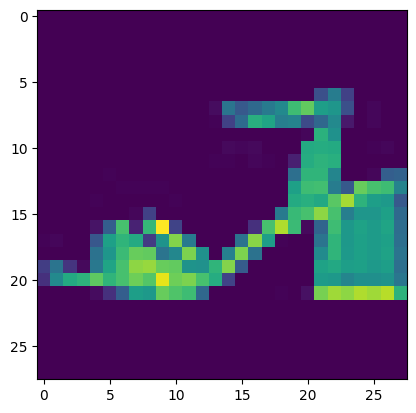

In [13]:
img_gt_to_show = img.squeeze(0).detach().cpu().numpy()
plt.imshow(img_gt_to_show.transpose(1,2,0))
plt.show()

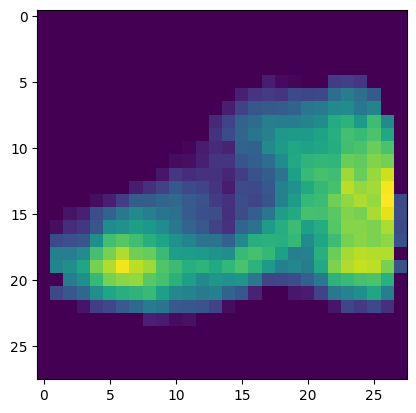

In [14]:
plt.imshow(img_to_show.transpose(1,2,0))
plt.show()